In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load all data analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [3]:
# Load train and test dataset
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

### Helper functions

In [4]:
# For plotting bar graph of categorical variable for both train and test dataset on same figure with percentage. 
def plot_train_test_norm_bar(train_se, test_se, title, figsize=(12,7)):
    fig, ax = plt.subplots(ncols=2, figsize=figsize)
    fig.suptitle(title)
    tr_va_co = train_se.fillna('missing').value_counts(normalize=True)
    te_va_co = test_se.fillna('missing').value_counts(normalize=True)
    sns.barplot(y = tr_va_co.index, x= tr_va_co.values*100, ax=ax[0])
    ax[0].set(title='Train dataset', xlabel= 'percentage', ylabel=str(train_se.name))
    sns.barplot(y = te_va_co.index, x= te_va_co.values*100, ax=ax[1])
    ax[1].set(title='Test dataset', xlabel='percentage')
    plt.plot()

# Data Exploration

#### Train dataset

In [5]:
print("Train dataset:")
train_df.head()

Train dataset:


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


#### Train dataset data types

In [6]:
# data types of each column in train dataset
print("Data-types of each columns in train dataset:\n")
print(train_df.dtypes)

Data-types of each columns in train dataset:

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object


#### Train dataset size

In [7]:
# size of train dataset.
print("size of Train dataset - rows: {} & columns: {}".format(train_df.shape[0], train_df.shape[1]))

size of Train dataset - rows: 13320 & columns: 9


#### Missing values in train dataset

In [8]:
# check missing values (NaNs) in train dataset
print("missing values in train dataset column wise:\n")
print(train_df.isnull().sum(axis=0))

missing values in train dataset column wise:

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


---
- `society` column has lots of missing values, 41.3 %.
  - Maybe all these house doesn't belong to any society.
  - Or, because of some data gathering problem these records has missing society value.
  - Or, it could be both of them.
---

#### Test dataset

In [9]:
print("Test dataset:")
test_df.head()

Test dataset:


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


#### Test dataset data types

In [10]:
print("Data-types of each column in Test dataset\n")
print(test_df.dtypes)

Data-types of each column in Test dataset

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object


#### Test dataset size

In [11]:
print("size of Test dataset - rows: {} & columns; {}".format(test_df.shape[0], test_df.shape[1]))

size of Test dataset - rows: 1480 & columns; 9


#### Missing values in Test dataset

In [12]:
print("missing values in Test dataset column wise:\n")
print(test_df.isnull().sum(axis=0))

missing values in Test dataset column wise:

area_type          0
availability       0
location           0
size               2
society          626
total_sqft         0
bath               7
balcony           69
price           1480
dtype: int64


## Univariate analysis

### `price` (target variable)
_price of the house_

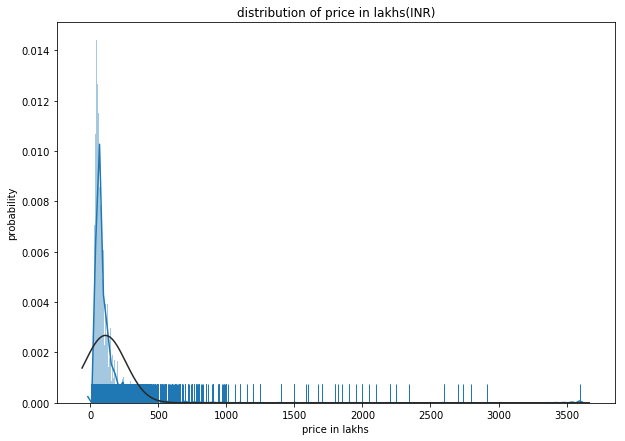

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(train_df['price'], kde=True, rug=True, ax=ax, bins=500, fit=stats.norm)
ax.set(title= 'distribution of price in lakhs(INR)', xlabel='price in lakhs', ylabel='probability')
plt.show()

---
- Distribution of `price` is highly righ skewed, so we should use transformation like log, box-cox or arcsin square root for prediction.
- Most of the house price lies below 500 lakhs.
- There are outliers in this dataset. You can see from thoes virticle lines (same height dark blue sticks) in the plot are dense below 500.
---

__Kurtosis__ measures whether your dataset is heavy-tailed or light-tailed compared to a normal distribution. Data sets with high kurtosis have heavy tails and more outliers and data sets with low kurtosis tend to have light tails and fewer outliers. 

In [16]:
#skewness and kurtosis
print("Skewness: %f" % train_df['price'].skew())
print("Kurtosis: %f" % train_df['price'].kurt())

Skewness: 8.064469
Kurtosis: 108.166513


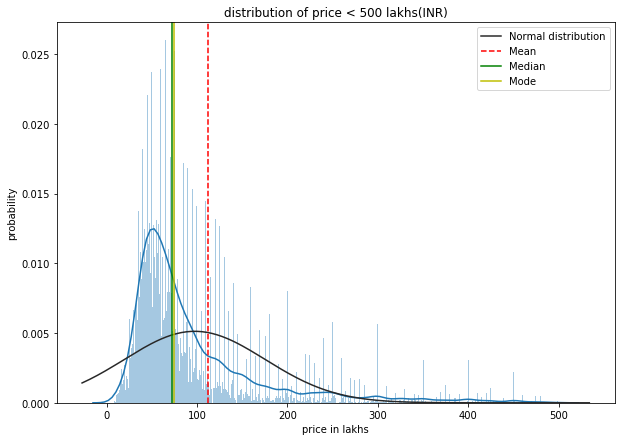

In [35]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(train_df[train_df['price'] < 500]['price'], kde=True, ax=ax, bins=500, fit=stats.norm)
ax.set(title= 'distribution of price < 500 lakhs(INR)', xlabel='price in lakhs', ylabel='probability')
ax.axvline(train_df['price'].mean(), color='r', linestyle='--')
ax.axvline(train_df['price'].median(), color='g', linestyle='-')
ax.axvline(train_df['price'].mode().get_values()[0], color='y', linestyle='-')
plt.legend({'Normal distribution': stats.norm, 'Mean':train_df['price'].mean(),'Median':train_df['price'].median(), 'Mode': train_df['price'].mode().get_values()[0]})
plt.show()

A __probability plot__ is also a great tool because a normal distribution would just follow the straight line.

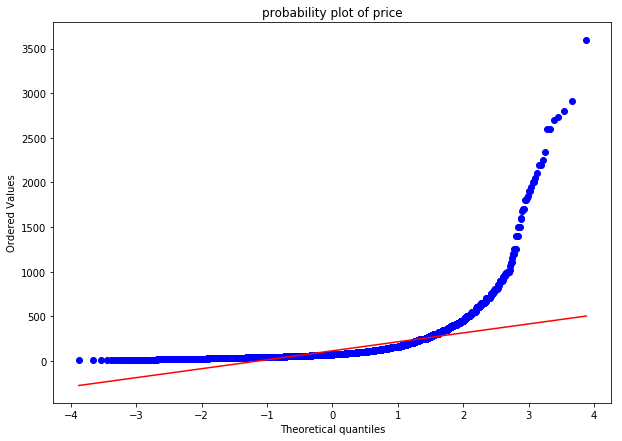

In [22]:
fig, ax = plt.subplots(figsize=(10, 7))
p_quants = stats.probplot(train_df['price'], plot=ax)
ax.set(title="probability plot of price")
plt.show()

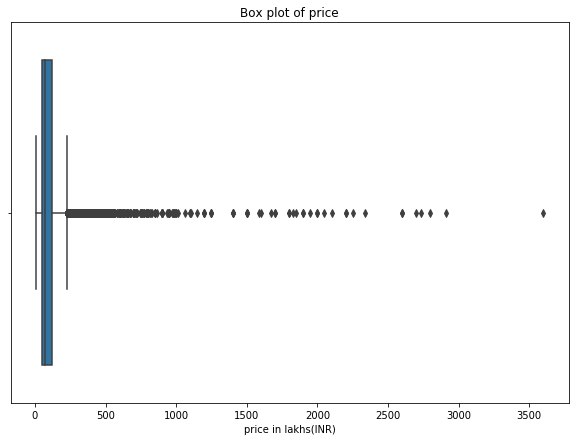

In [15]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(train_df['price'], ax=ax)
ax.set(xlabel= 'price in lakhs(INR)', title='Box plot of price')
plt.show()

In [19]:
# find mode (most frequent occuring price value) of price
train_df['price'].mode()

0    75.0
dtype: float64

In [16]:
print('Descriptive statistics of price column:\n')
print(train_df['price'].describe())

Descriptive statistics of price column:

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64


---
From above box plot and descriptive statistics we can say:-
- __Measure of spread__:
  - `price` ranges from minimum 8 lakh to maximum 3600 lakh.
  - So, the <u>range</u> is [8, 3600] lakhs.
  - <u>standard deviation</u> is 148.97, which is quite high given 25% and 75% values. Which indicates high skewness of the data.
  - std gives measure of spread around mean value.
  - Here lower quartile (Q1) (25%) value is 50 lakh and upper quartile (Q3) (75%) value is 120 lakh.
  - That means 50% of house has price betwen 50 lakh to 120 lakh.
  - <u>Inter quartile range (IQR)</u> : Q3 - Q1 = 120 - 50 = 70 lakh.
  - The IQR is often seen as a better measure of spread than the range as it is not affected by outliers.
  - <u>outliers</u>: In box plot we can see whiskers (Lines extending from box), price outside of this whiskers are considered outliers.
  - Anything outside of the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] is outlier.
  - Here any price value below 0 and above 295 lakh is considered outlier.
  
  
- __Measure of central tendency__:
  - Data has <u>average</u> (mean) price value of 112.56 lakhs and <u>median</u> (50% quartile) (Q2) price value of 72 lakhs.
---


In [17]:
# Find number of outliers
print("{0: .2f} of records has outlier price".format(((train_df['price'] > 295).sum() / train_df.shape[0]) * 100))

 5.99 of records has outlier price


### `balcony`
_number of balcony in the house_

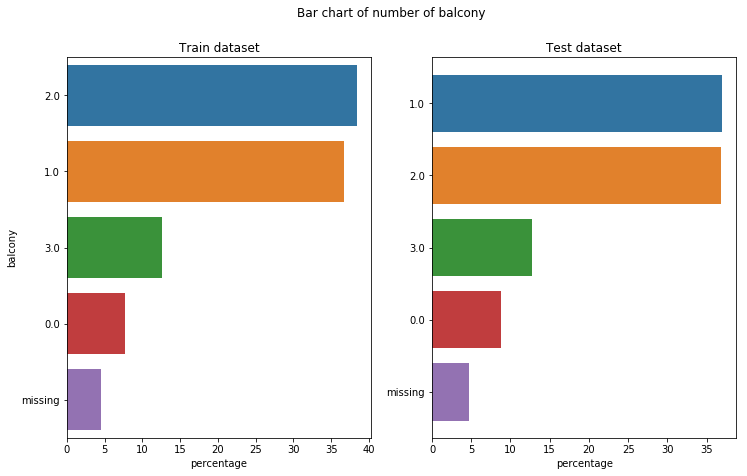

In [18]:
plot_train_test_norm_bar(train_df['balcony'], test_df['balcony'], "Bar chart of number of balcony")

---

- There are more houses which has 1 or 2 balcony, around 37% each.  
- Around 4% of the record has missing balcony value in both train and test dataset.

---

### `bath`
_number of bathrooms in the house_

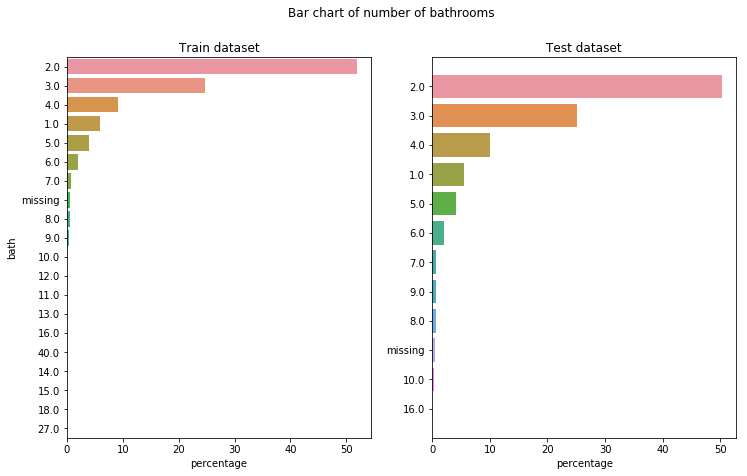

In [19]:
plot_train_test_norm_bar(train_df['bath'], test_df['bath'], 'Bar chart of number of bathrooms')

---

- 50% of houses has 2 bathrooms.
- There are also some house which has more than 10 bathrooms.
- Test dataset doesn't contain some bath records which are present in Train dataset. e.g. 40, 40, 18, 27 etc.

---

### `area_type`
_describes type of area_

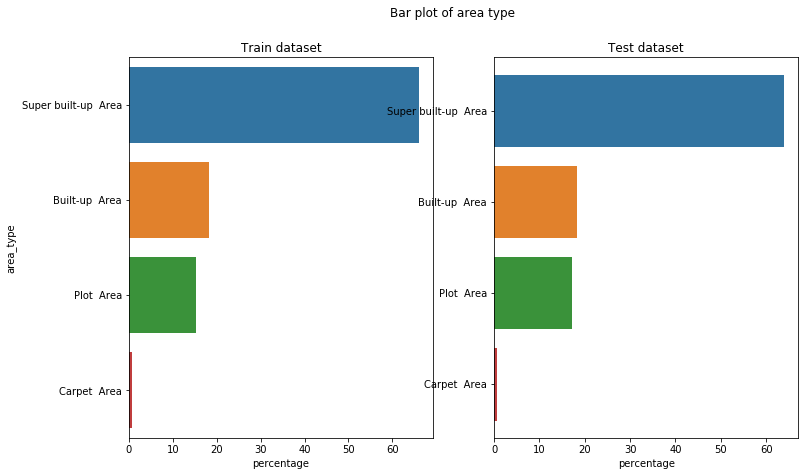

In [20]:
plot_train_test_norm_bar(train_df['area_type'], test_df['area_type'], "Bar plot of area type")

---

- Around 65% of house has super built up area type both in Train and Test dataset.

---

### `size`
_size of house in BHK, RK and, bedrooms format_

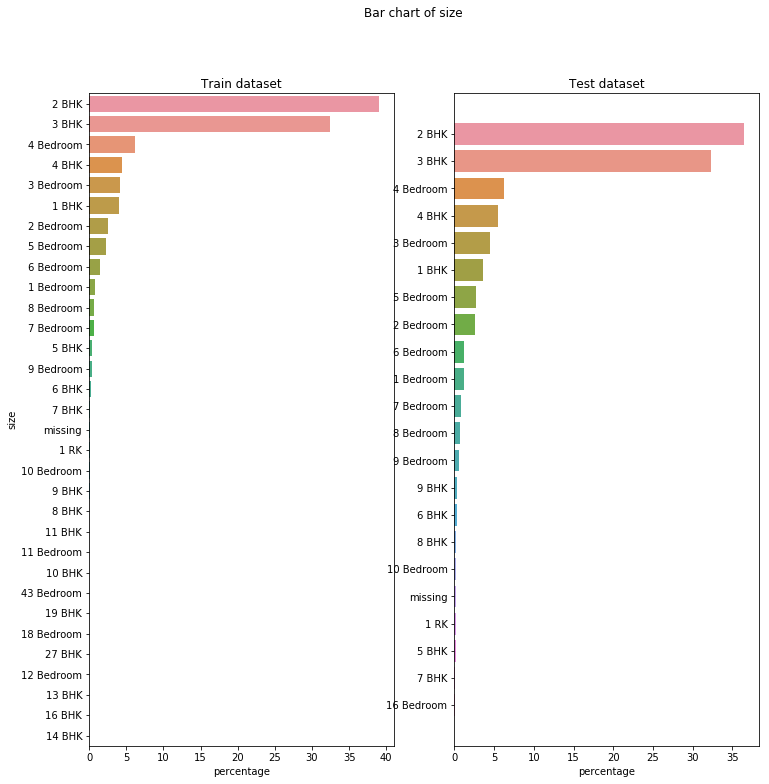

In [21]:
plot_train_test_norm_bar(train_df['size'], test_df['size'], "Bar chart of size", (12, 12))

---

- Most of the house are 2BHK or 3BHK, around 70% combined.
- some of the size types are not present in train data which are present in test data.
- some of the size types are not present in test data which are present in train data.

---

### `availability`
_from when the house is available (date, ready to move, Immediate Possession)_

In [22]:
train_df['availability'].value_counts()

Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     21
19-Sep                     21
22-Jun                     19
19-Aug                     18
21-Jun                     17
Immediate Possession       16
20-Aug                     16
19-Apr                     16
                        ...  
20-Sep                      6
21-Sep                      6
17-Mar    